In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("Automobile_insurance_fraud.csv")
column_names = [
    'months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state',
    'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip',
    'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship',
    'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type',
    'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location',
    'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses',
    'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
    'auto_make', 'auto_model', 'auto_year', 'fraud_reported'
]

df.columns = column_names
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 228   42         342868       27-06-2006           IN   
1                 134   29         687698       06-09-2000           OH   
2                 256   41         227811       25-05-1990           IL   
3                 228   44         367455       06-06-2014           IL   
4                 256   39         104594       12-10-2006           OH   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               2000                1197.22         5000000   
1    100/300               2000                1413.14         5000000   
2    250/500               2000                1415.74         6000000   
3   500/1000               1000                1583.91         6000000   
4    250/500               1000                1351.10               0   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       468176  ...         0                       ?               5070   
1       430632  ...         3                      NO              34650   
2       608117  ...         2                      NO              63400   
3       610706  ...         1                      NO               6500   
4       478456  ...         2                      NO              64100   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0          780            780           3510   Mercedes       E400      2007   
1         7700           3850          23100      Dodge        RAM      2007   
2         6340           6340          50720  Chevrolet      Tahoe      2014   
3         1300            650           4550     Accura        RSX      2009   
4         6410           6410          51280       Saab         95      2003   

  fraud_reported  
0              Y  
1              N  
2              Y  
3              N  
4              Y  

[5 rows x 39 columns]

In [2]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           999 non-null    int64  
 1   age                          999 non-null    int64  
 2   policy_number                999 non-null    int64  
 3   policy_bind_date             999 non-null    object 
 4   policy_state                 999 non-null    object 
 5   policy_csl                   999 non-null    object 
 6   policy_deductable            999 non-null    int64  
 7   policy_annual_premium        999 non-null    float64
 8   umbrella_limit               999 non-null    int64  
 9   insured_zip                  999 non-null    int64  
 10  insured_sex                  999 non-null    object 
 11  insured_education_level      999 non-null    object 
 12  insured_occupation           999 non-null    object 
 13  insured_hobbies     

In [4]:
df.describe()

months_as_customer         age  policy_number  policy_deductable  \
count          999.000000  999.000000     999.000000         999.000000   
mean           203.829830   38.938939  546263.326326        1136.136136   
std            115.103809    9.140370  257190.576942         612.155989   
min              0.000000   19.000000  100804.000000         500.000000   
25%            115.500000   32.000000  335913.500000         500.000000   
50%            199.000000   38.000000  533940.000000        1000.000000   
75%            276.000000   44.000000  759459.500000        2000.000000   
max            479.000000   64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count             999.000000    9.990000e+02     999.000000     999.000000   
mean             1256.255495    1.102102e+06  501249.605606   25097.897898   
std               244.243187    2.298293e+06   71728.919924   27871.869471   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.185000    0.000000e+00  448373.000000       0.000000   
50%              1257.040000    0.000000e+00  466498.000000       0.000000   
75%              1415.710000    0.000000e+00  603254.000000   51000.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count     999.000000                999.000000                   999.000000   
mean   -26820.520521                 11.650651                     1.839840   
std     28105.366259                  6.951671                     1.019044   
min   -111100.000000                  0.000000                     1.000000   
25%    -51500.000000                  6.000000                     1.000000   
50%    -24100.000000                 12.000000                     1.000000   
75%         0.000000                 17.000000                     3.000000   
max         0.000000                 23.000000                     4.000000   

       bodily_injuries   witnesses  total_claim_amount  injury_claim  \
count       999.000000  999.000000          999.000000    999.000000   
mean          0.991992    1.486486        52743.073073   7434.344344   
std           0.820538    1.111773        26408.011569   4883.309038   
min           0.000000    0.000000          100.000000      0.000000   
25%           0.000000    1.000000        41775.000000   4290.000000   
50%           1.000000    1.000000        57970.000000   6780.000000   
75%           2.000000    2.000000        70550.000000  11310.000000   
max           2.000000    3.000000       114920.000000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count      999.000000     999.000000   999.000000  
mean      7393.943944   37914.784785  2005.104104  
std       4823.859773   18890.397013     6.018773  
min          0.000000      70.000000  1995.000000  
25%       4440.000000   30275.000000  2000.000000  
50%       6750.000000   42080.000000  2005.000000  
75%      10870.000000   50775.000000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

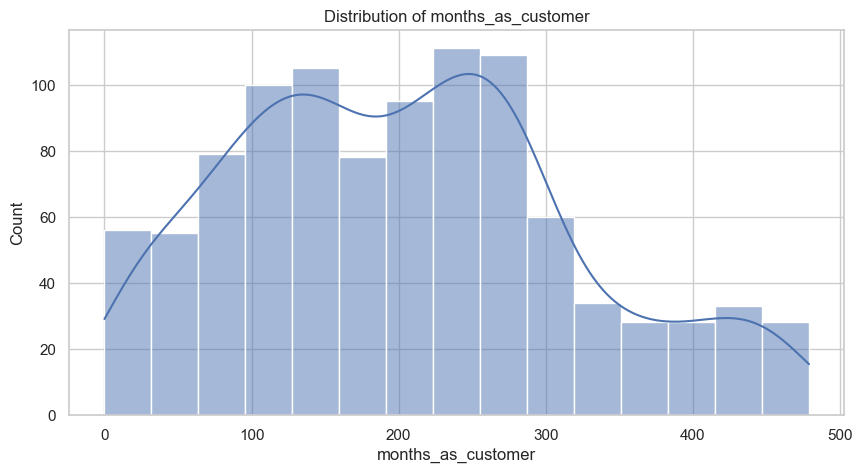

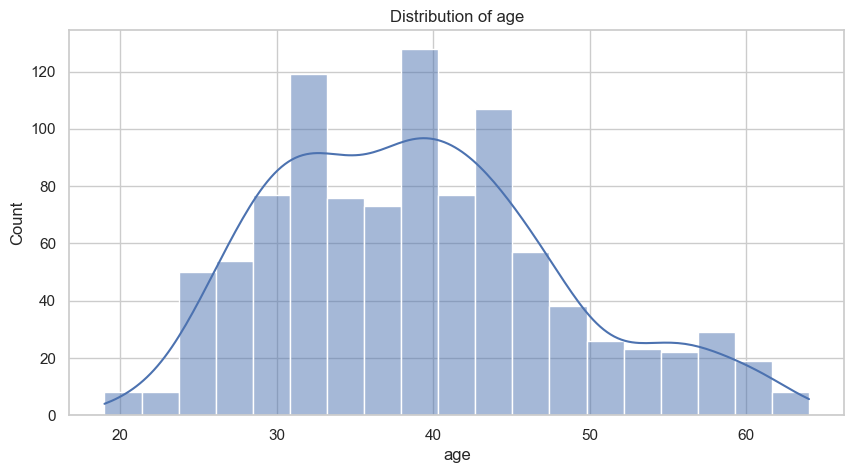

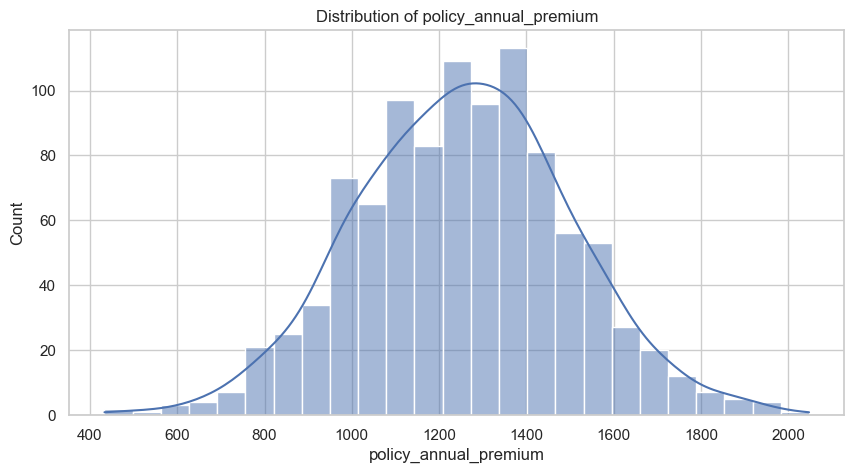

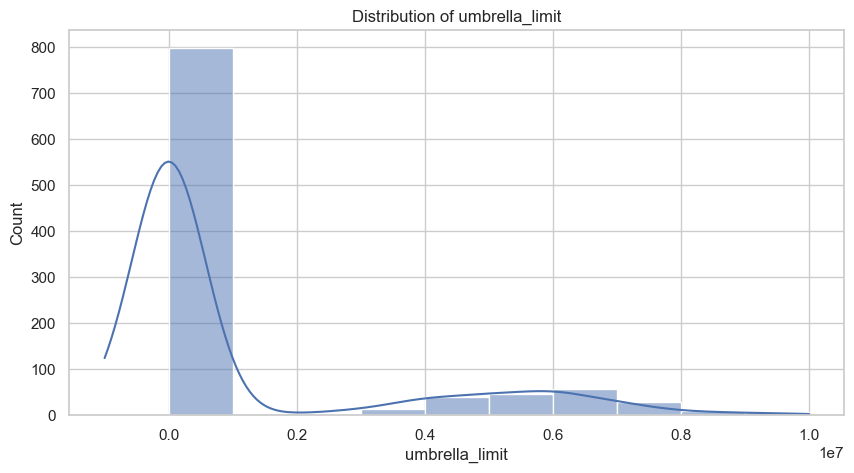

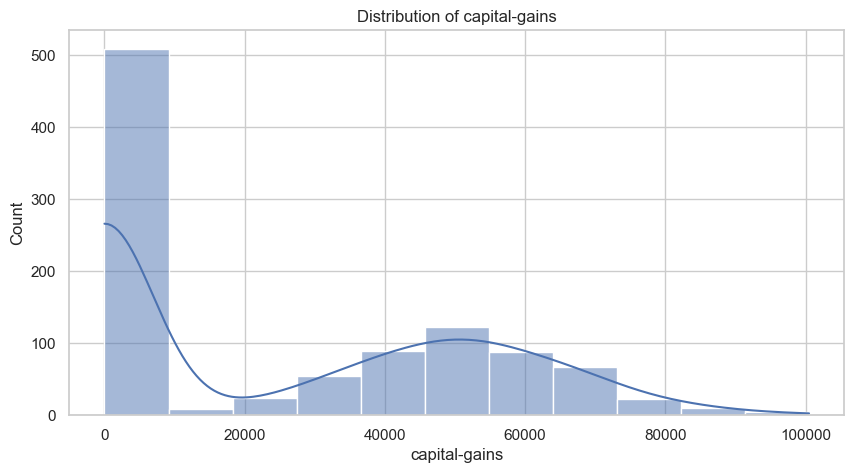

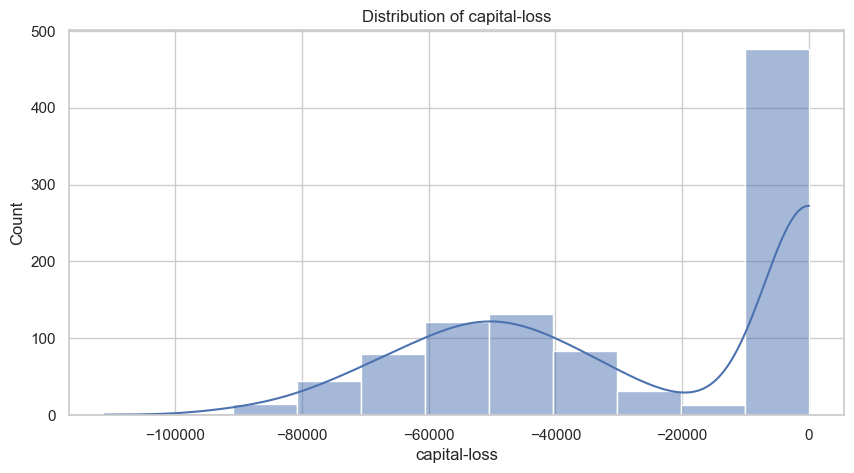

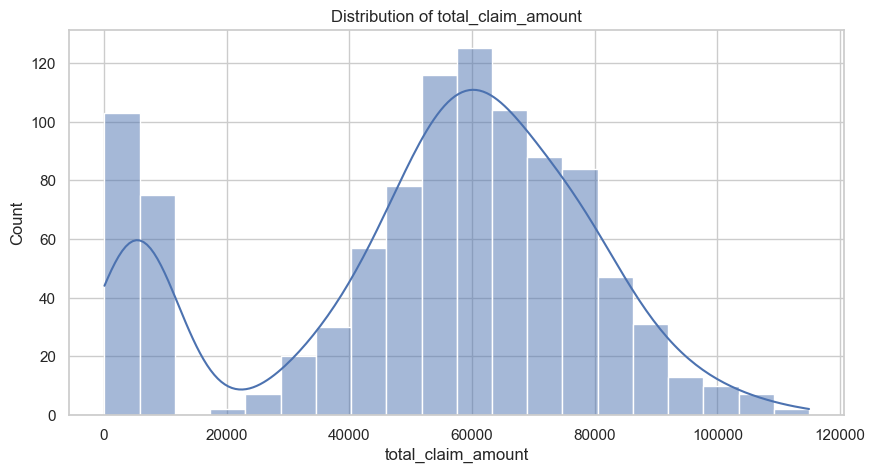

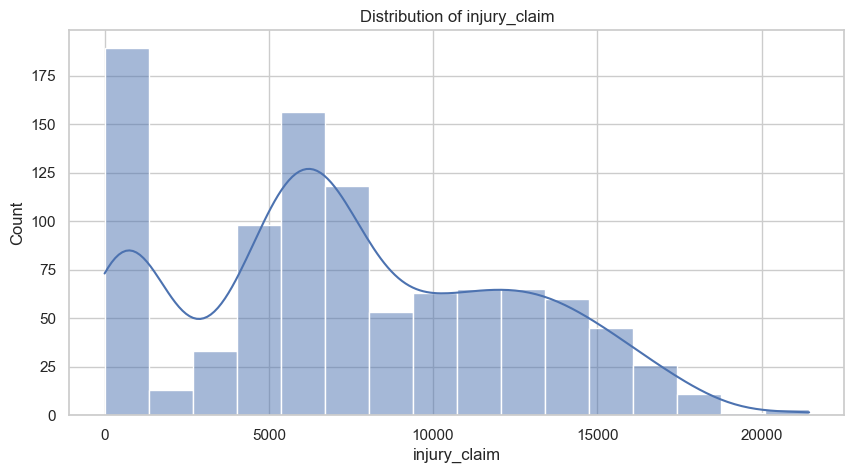

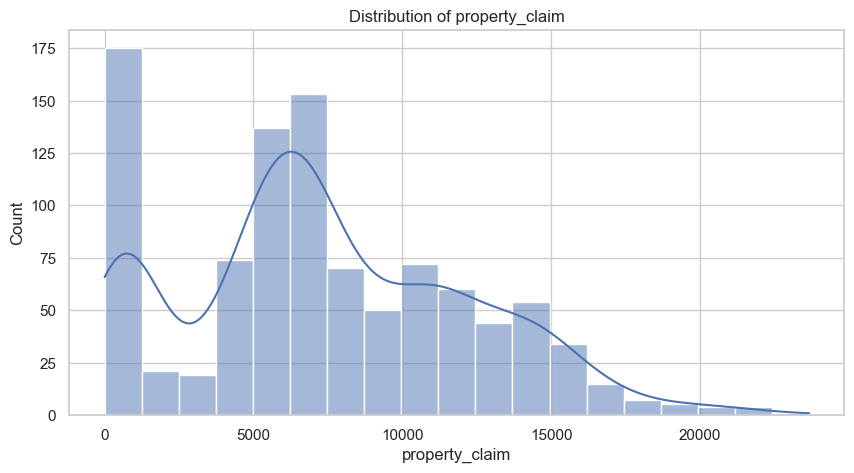

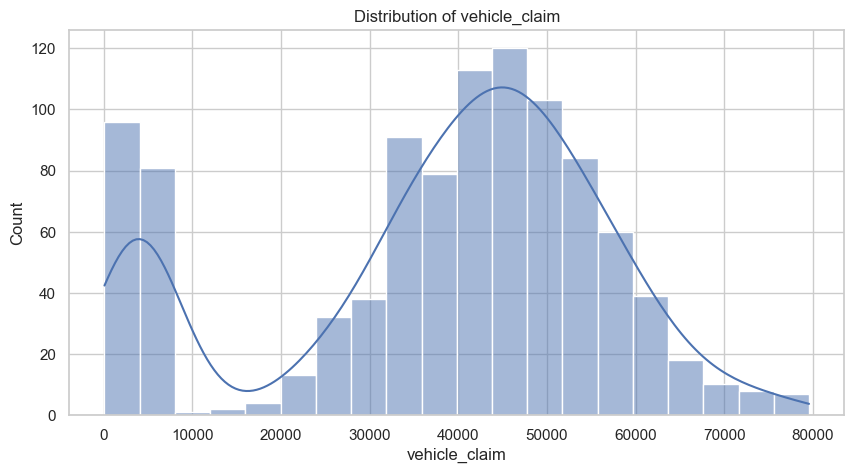

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
numerical_col = ['months_as_customer', 'age', 'policy_annual_premium', 'umbrella_limit', 
                     'capital-gains', 'capital-loss', 'total_claim_amount', 'injury_claim', 
                     'property_claim', 'vehicle_claim']

for col in numerical_col:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


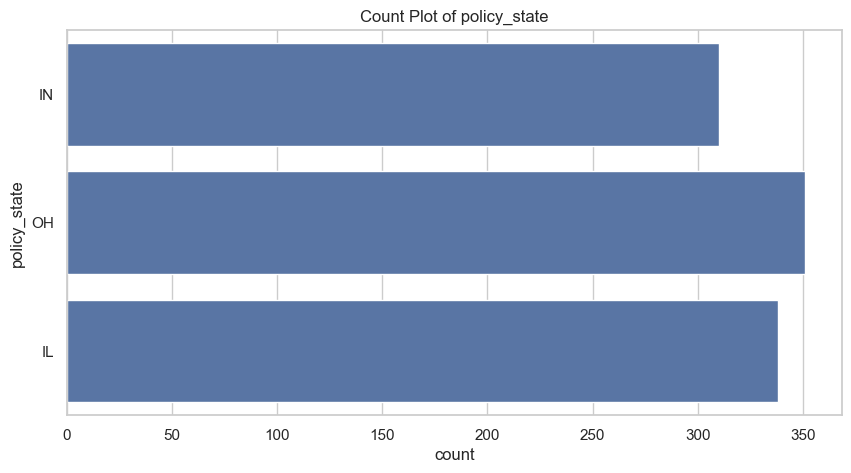

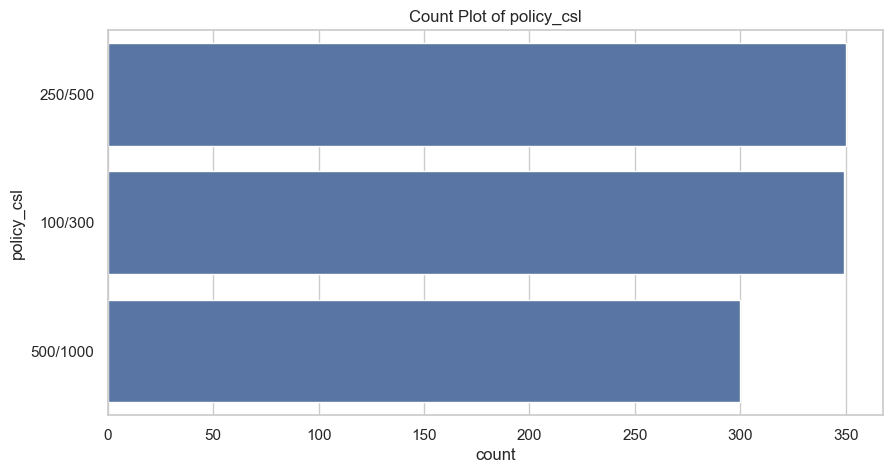

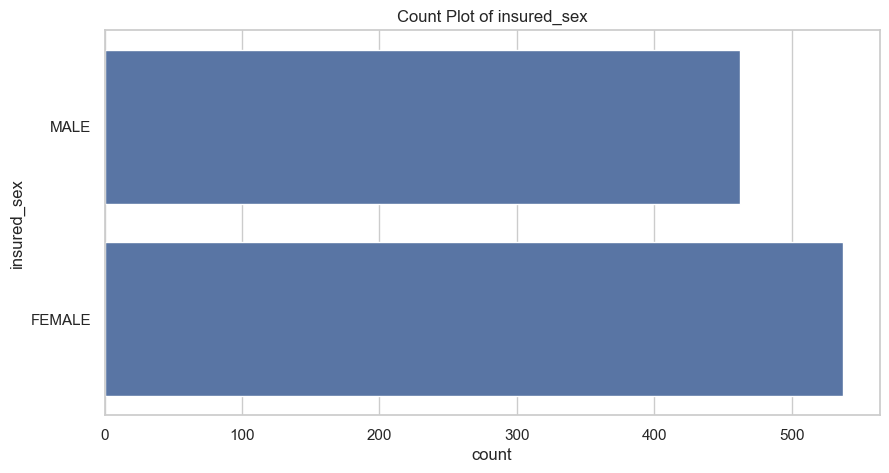

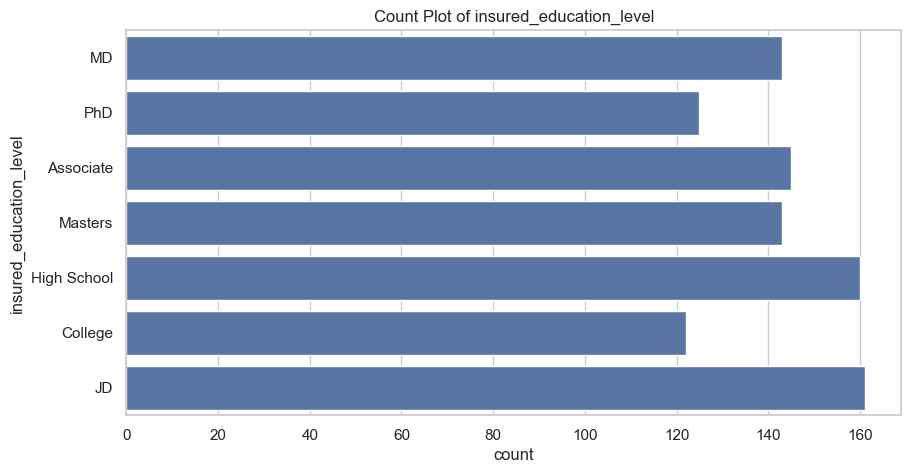

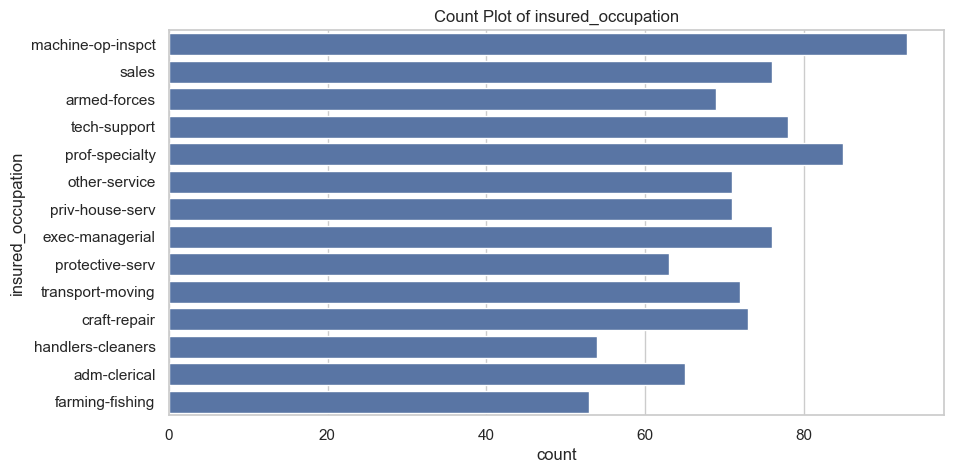

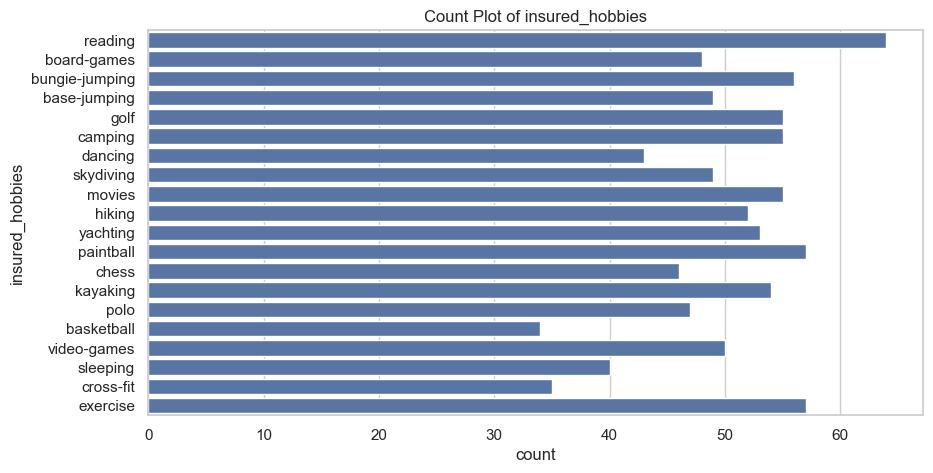

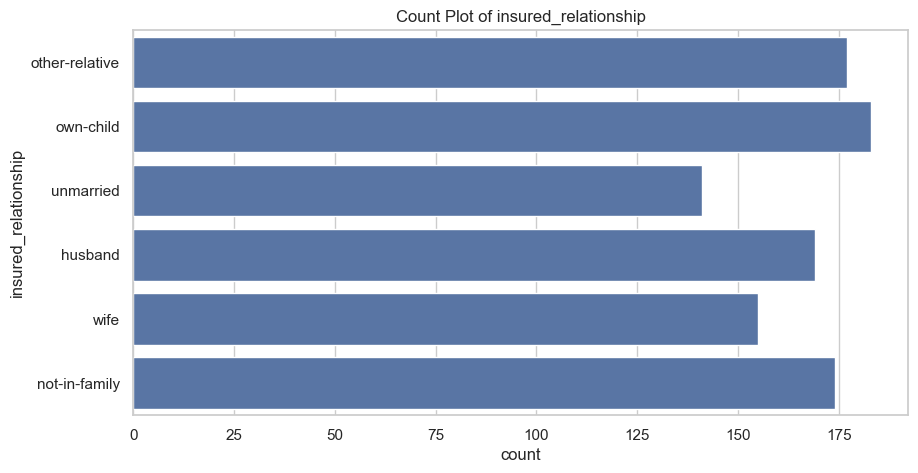

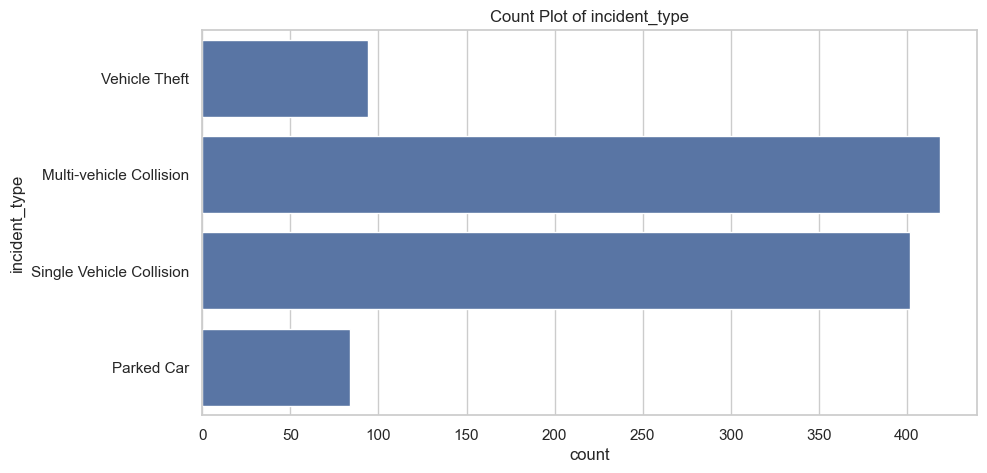

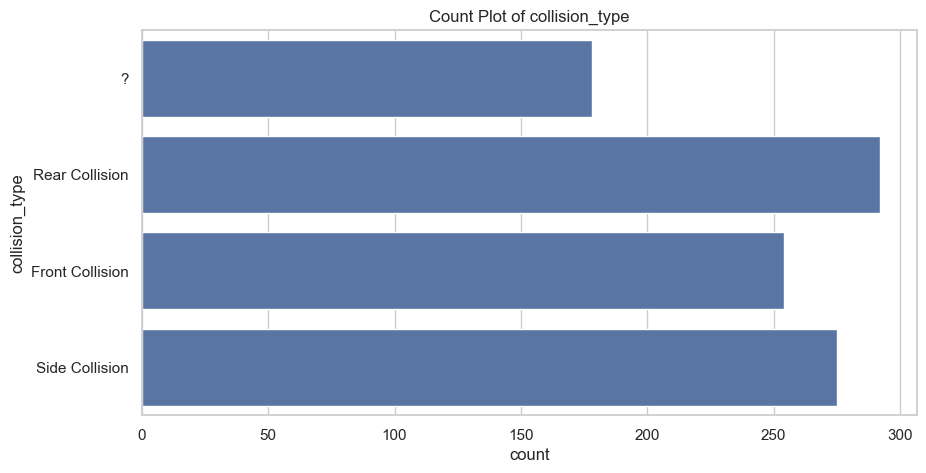

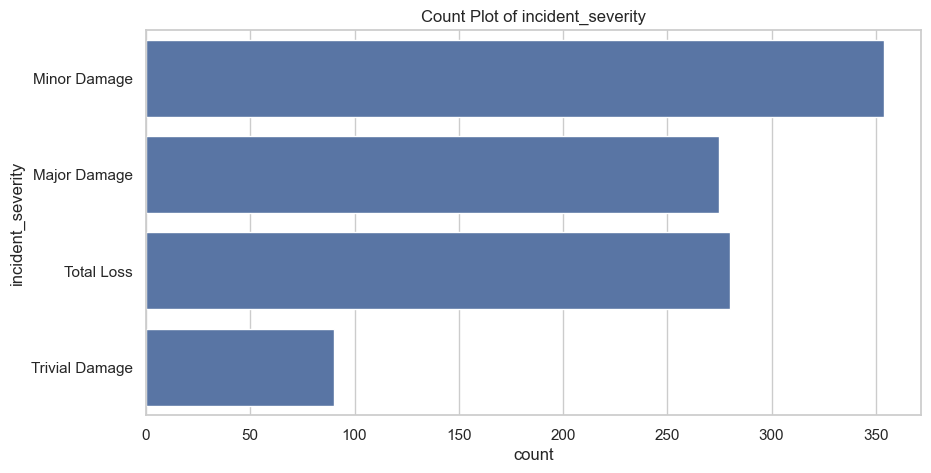

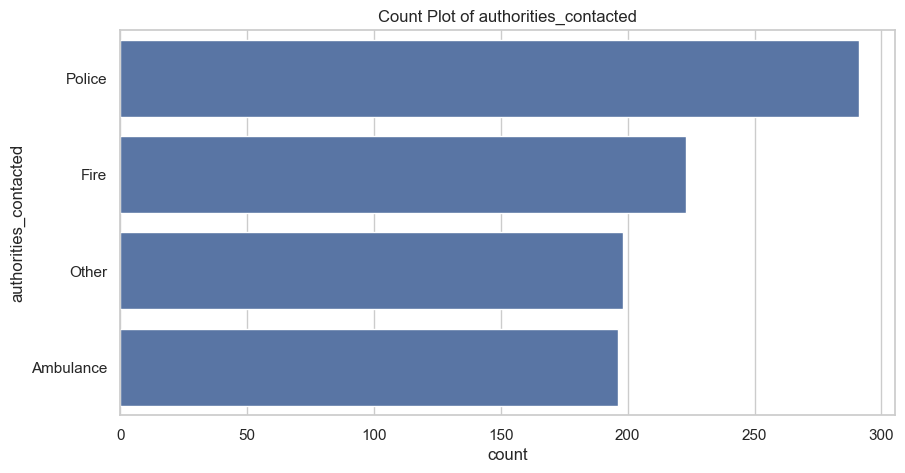

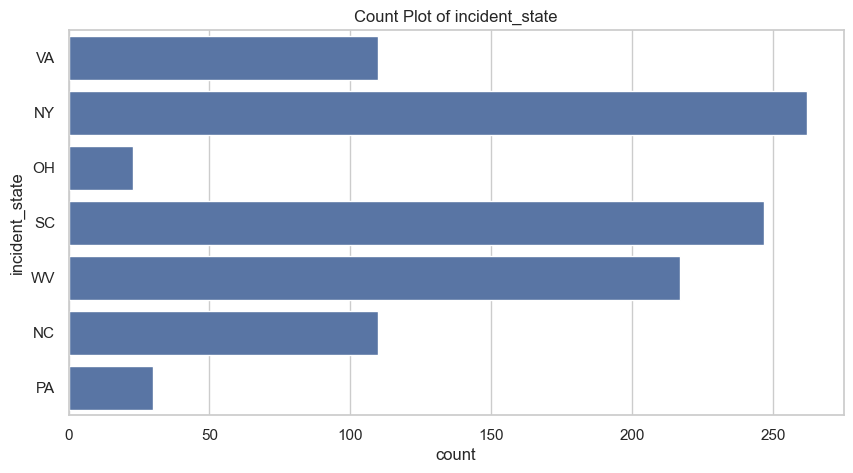

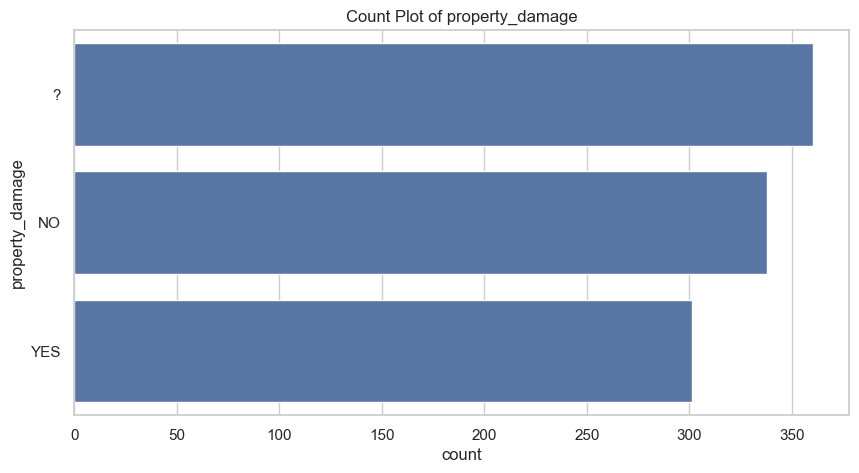

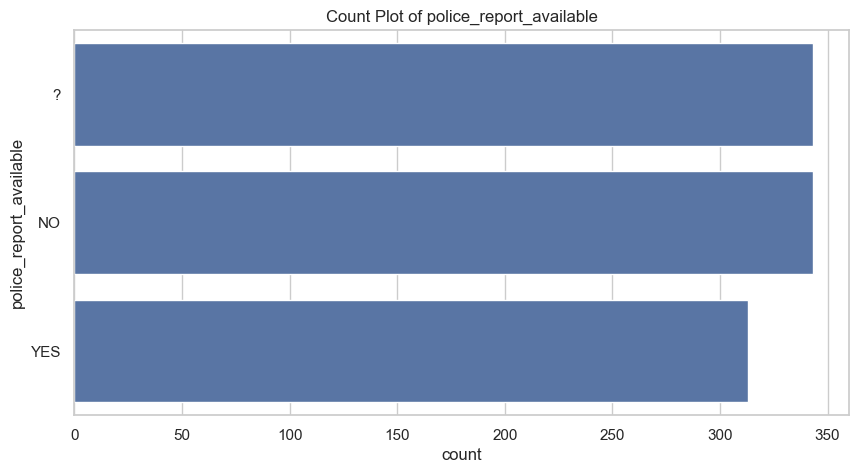

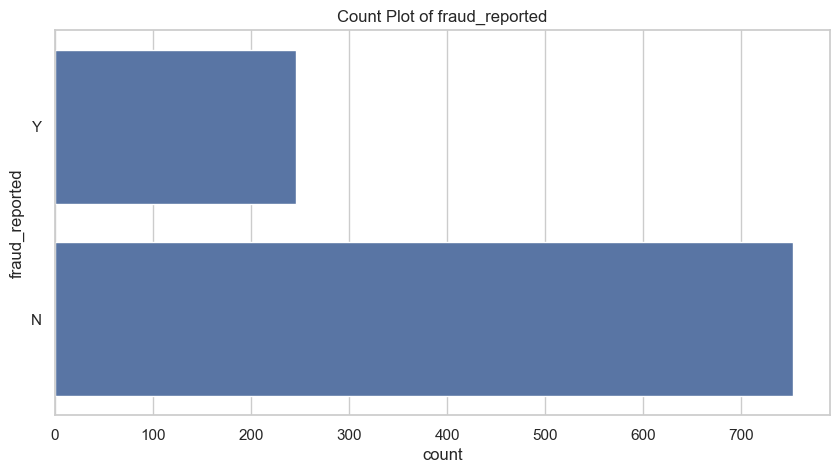

In [7]:
categorical_col = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 
                       'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 
                       'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 
                       'property_damage', 'police_report_available', 'fraud_reported']

for col in categorical_col:
    plt.figure(figsize=(10, 5))
    sns.countplot(df[col])
    plt.title(f'Count Plot of {col}')
    plt.show()


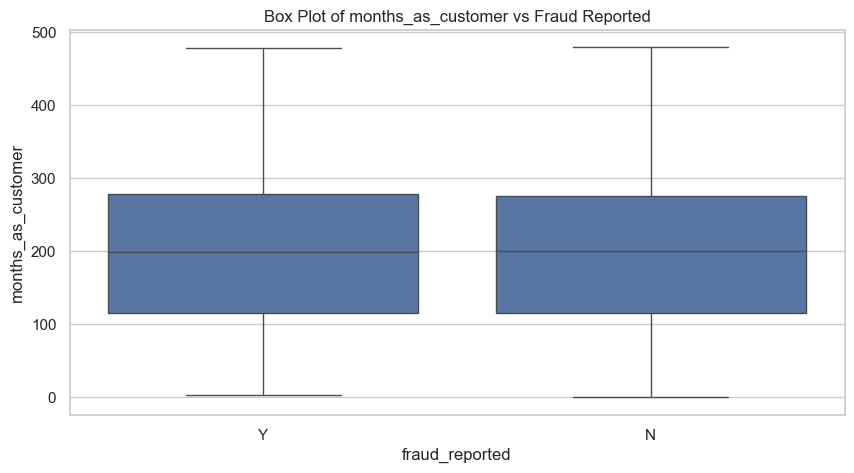

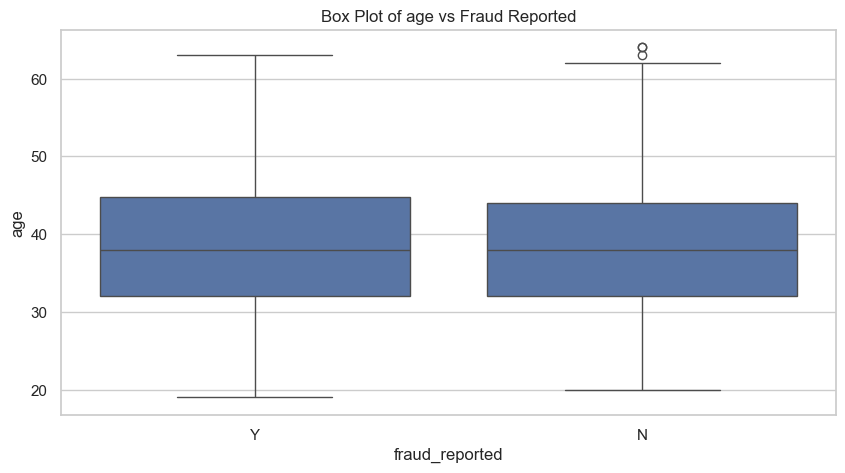

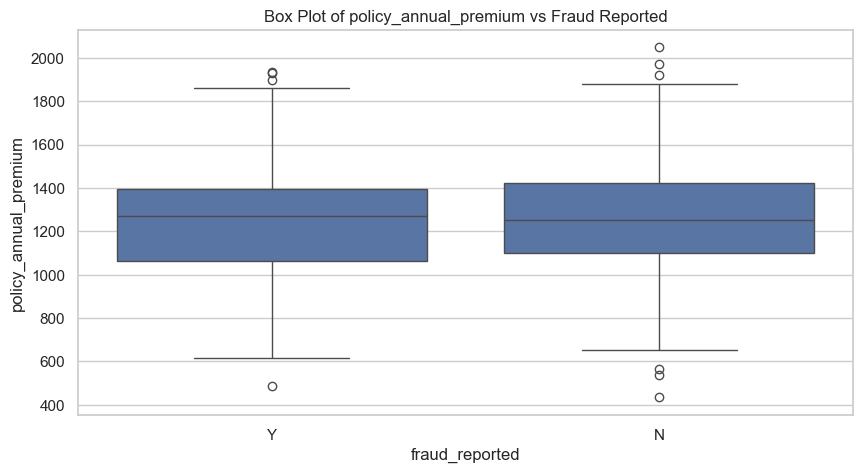

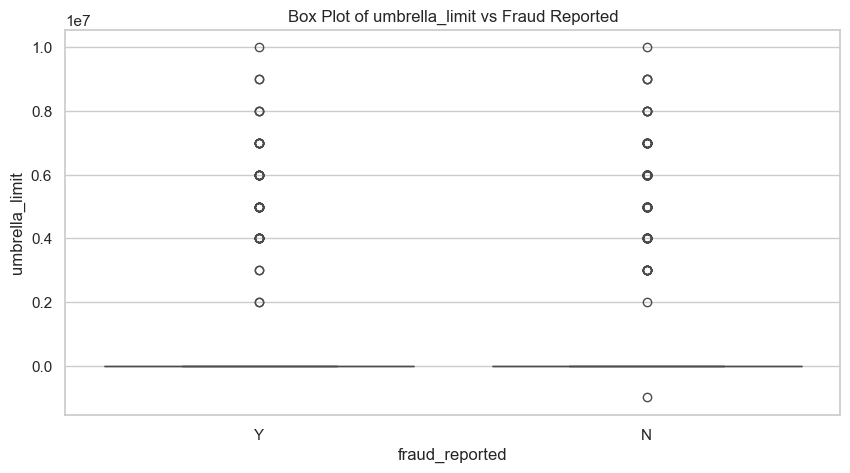

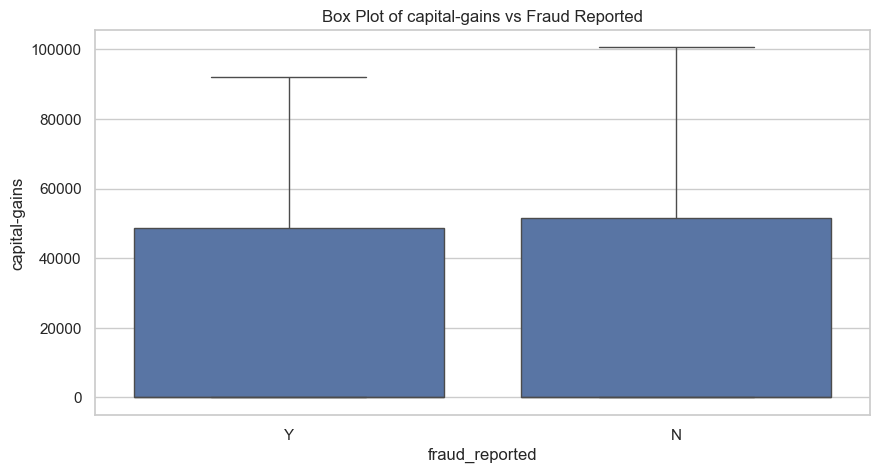

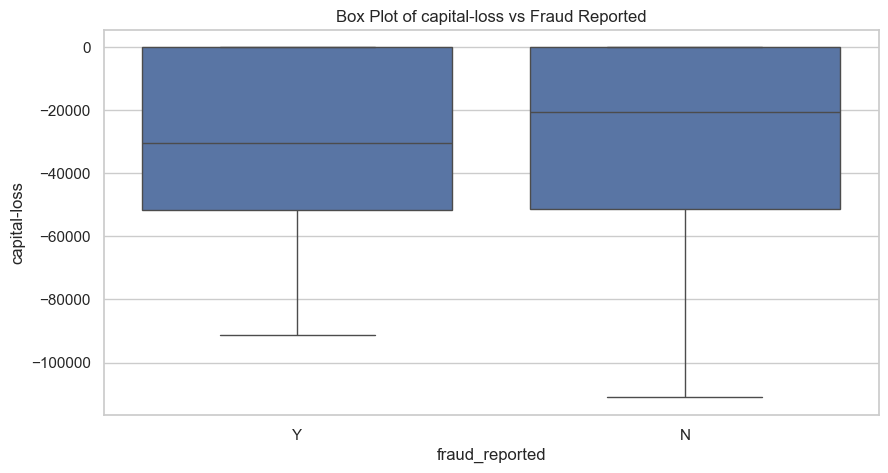

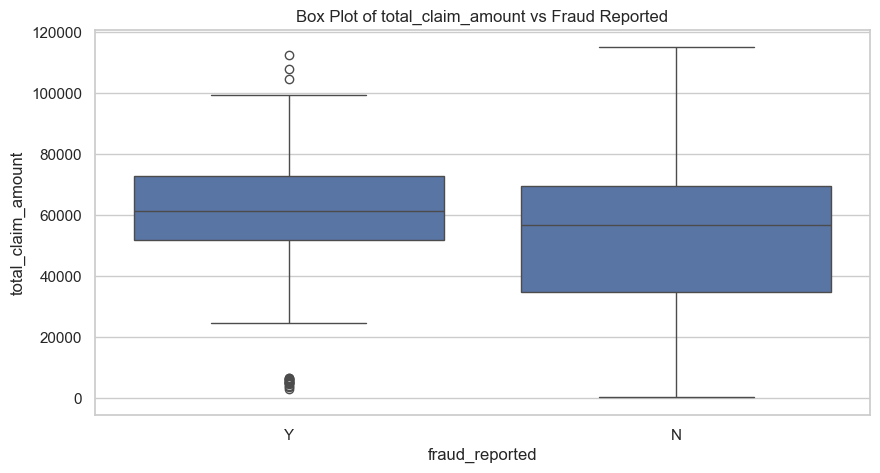

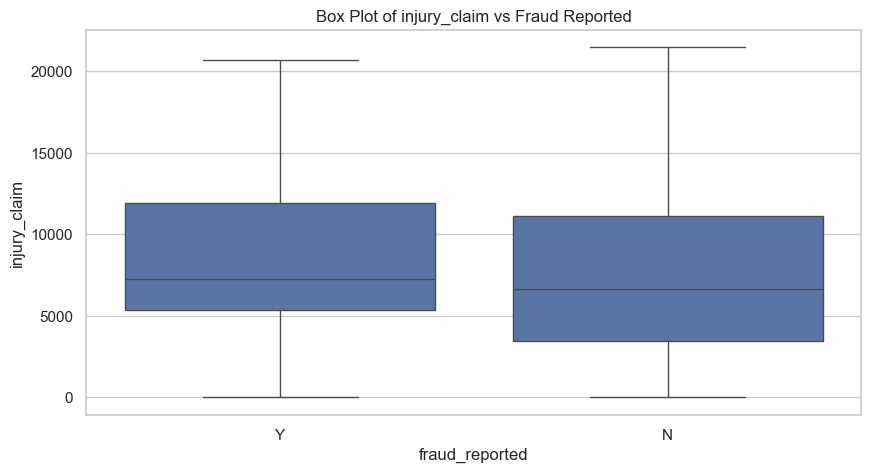

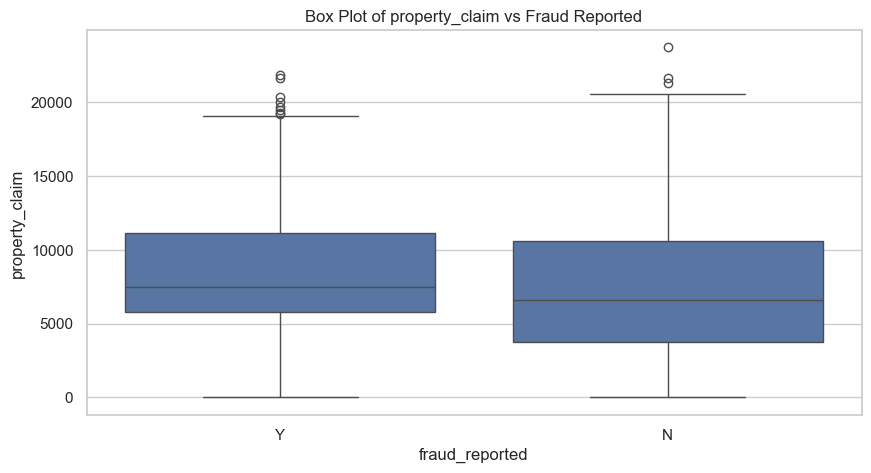

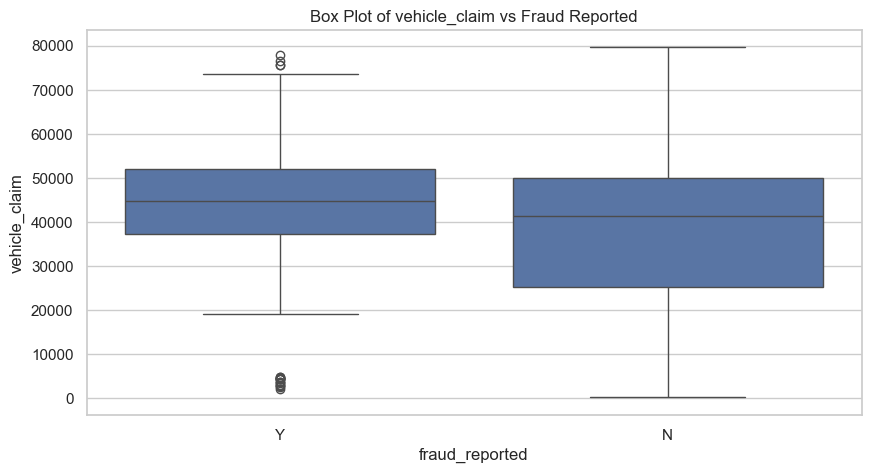

In [8]:

for col in numerical_col:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='fraud_reported', y=col, data=df)
    plt.title(f'Box Plot of {col} vs Fraud Reported')
    plt.show()


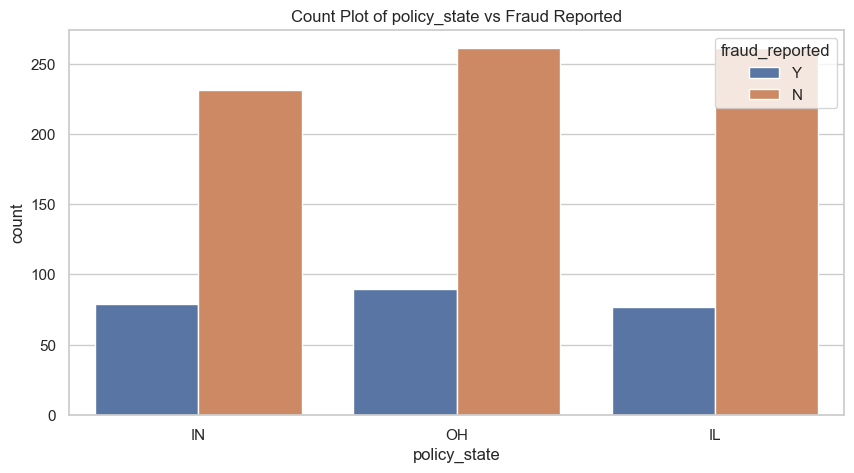

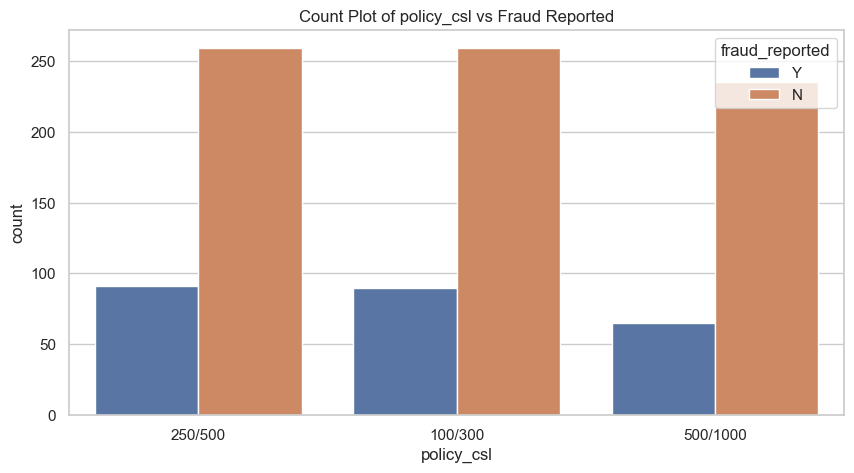

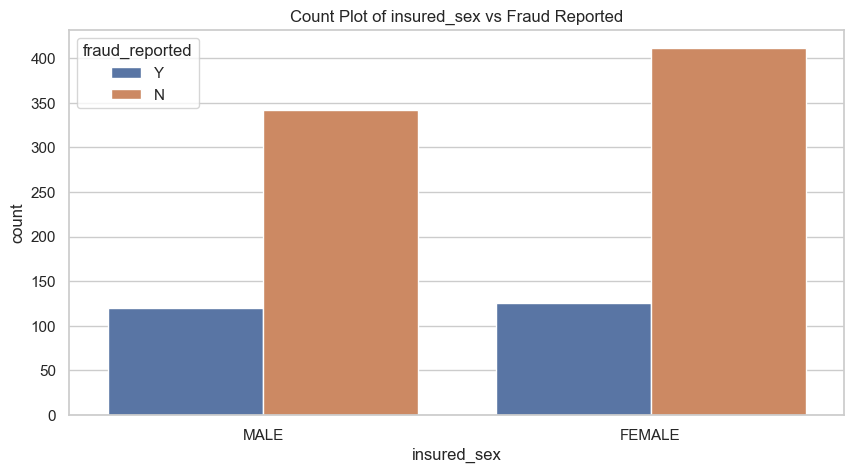

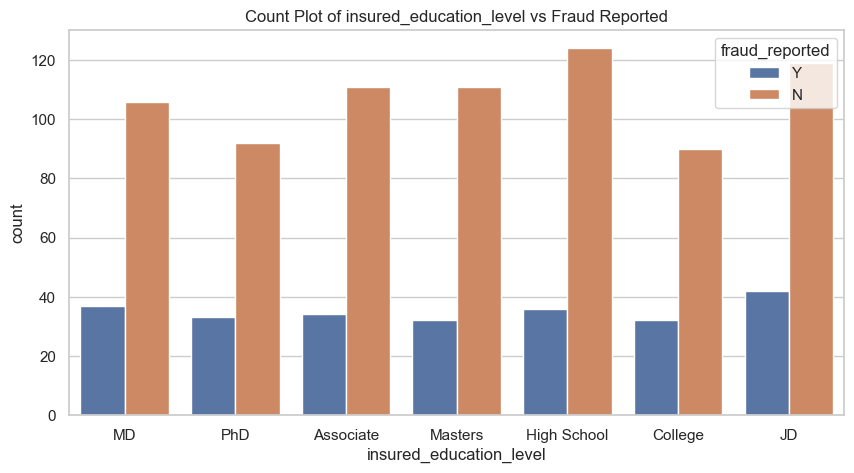

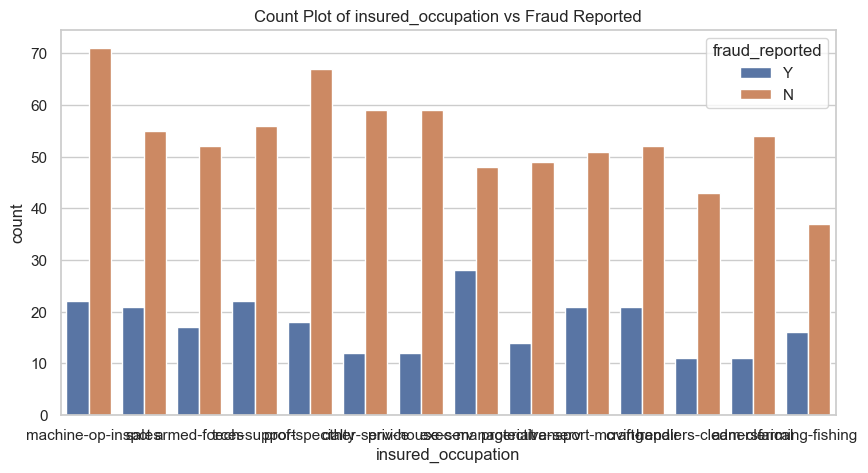

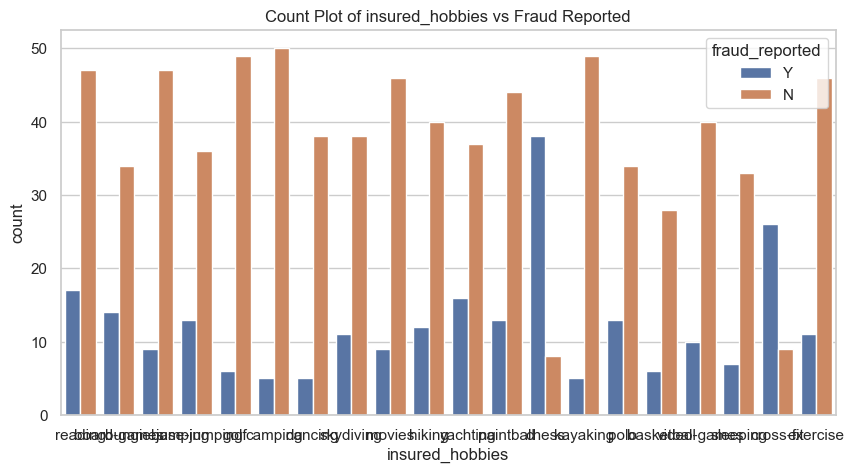

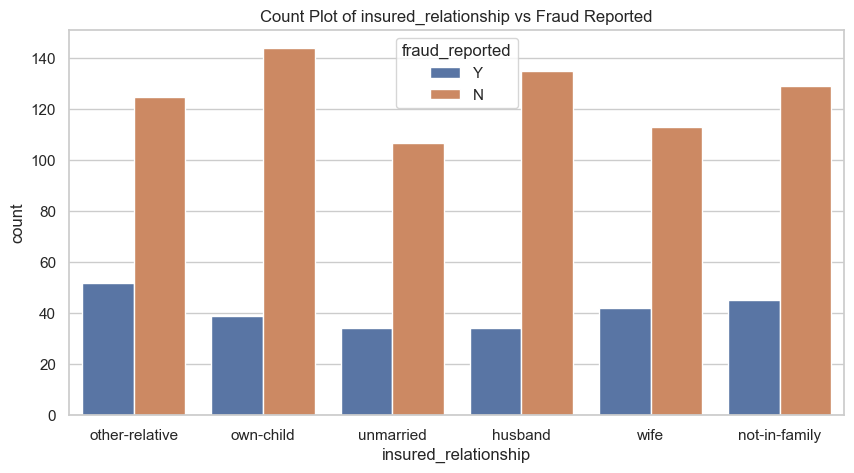

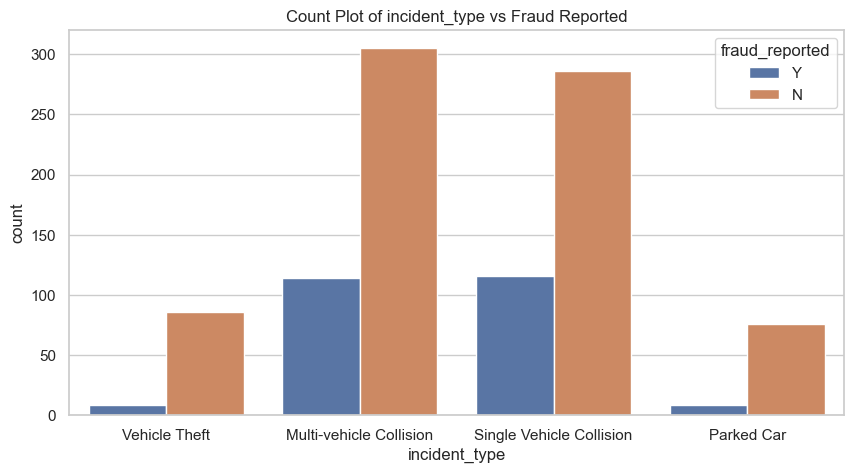

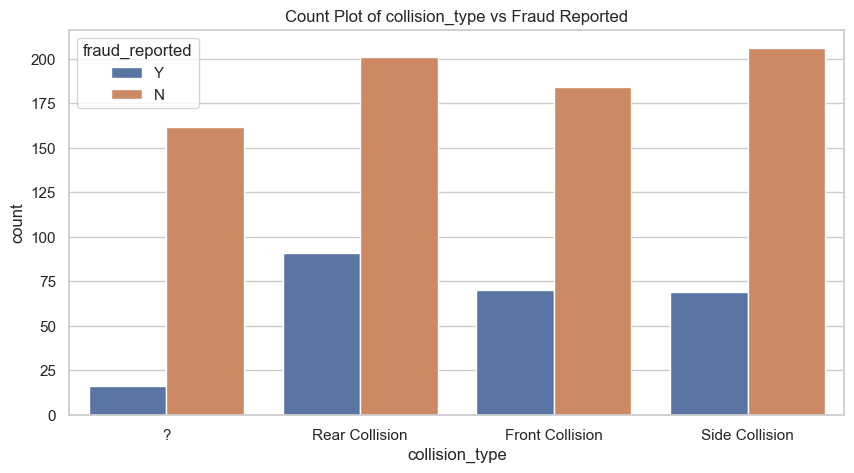

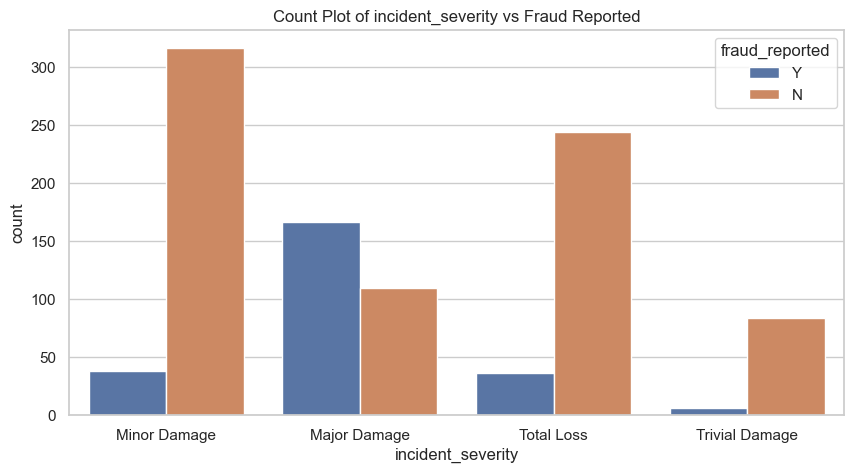

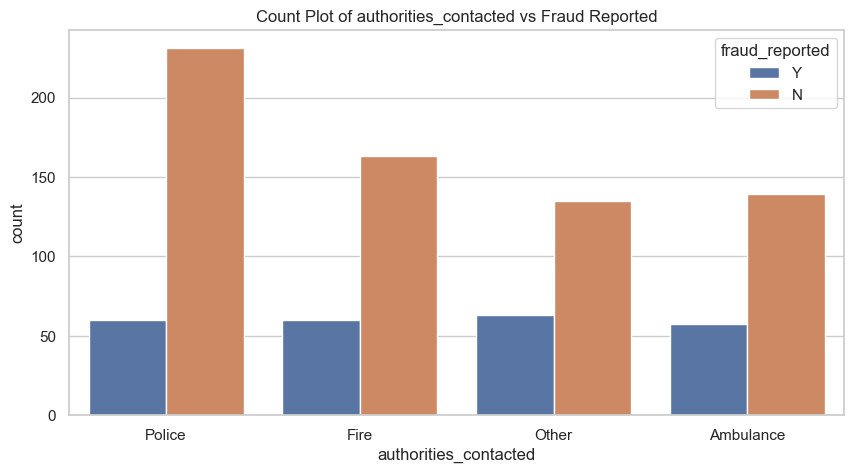

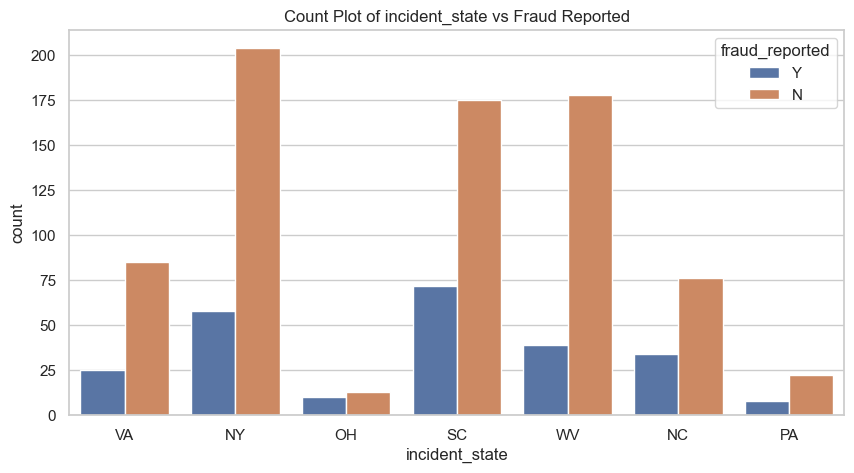

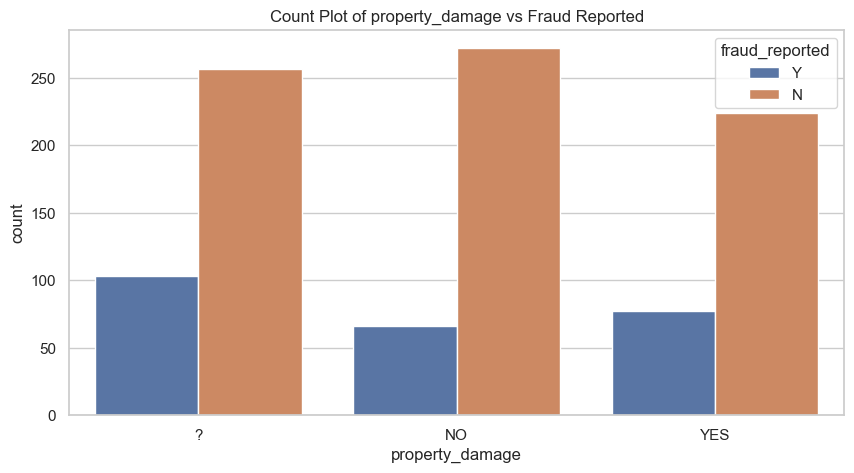

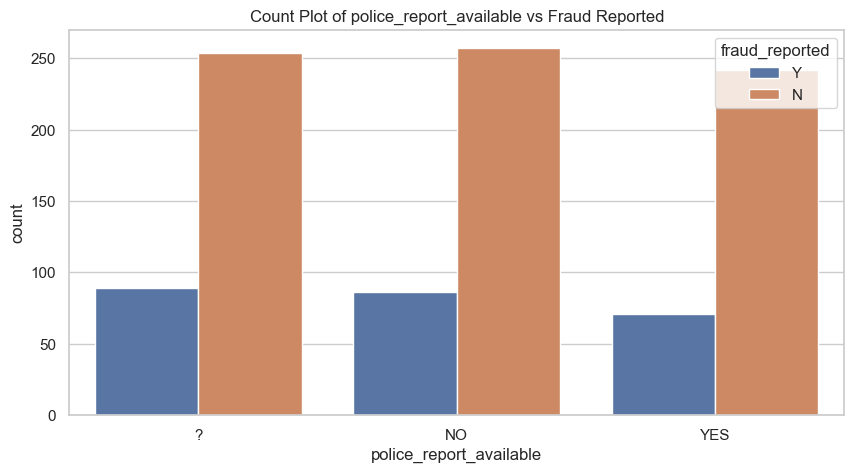

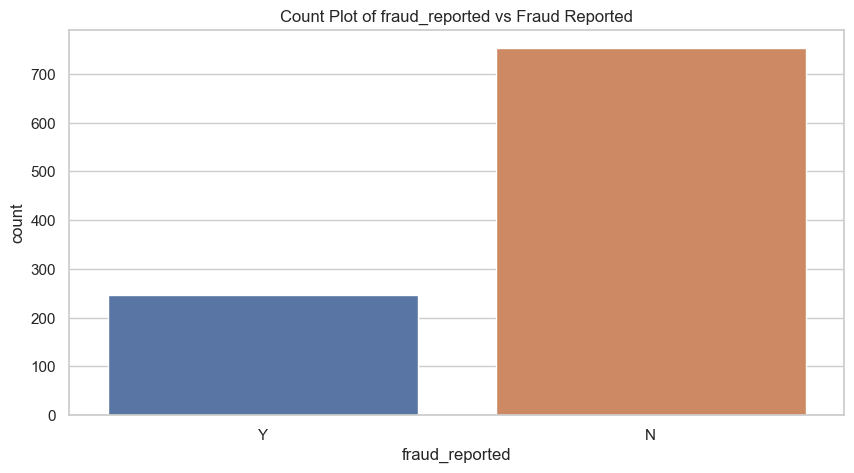

In [9]:

for col in categorical_col:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='fraud_reported', data=df)
    plt.title(f'Count Plot of {col} vs Fraud Reported')
    plt.show()


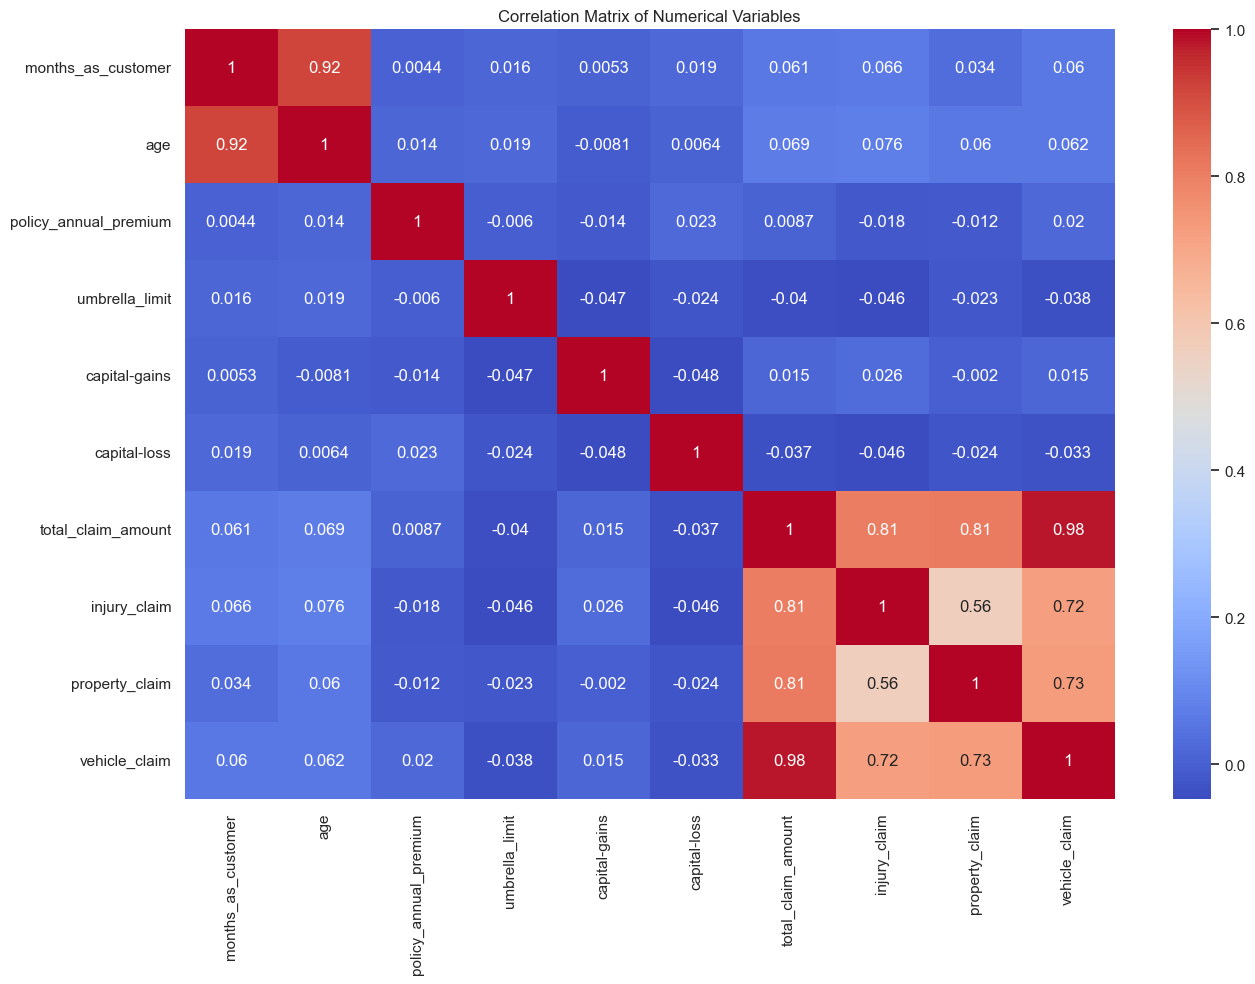

In [10]:

plt.figure(figsize=(15, 10))
correlation_matrix = df[numerical_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


The given graph indicates strong correlations among injury_claim, property_claim, vehicle_claim, and total_claim_amount, suggesting these features are crucial for fraud prediction. High correlation between months_as_customer and age implies redundancy, indicating one can be dropped to avoid multicollinearity.

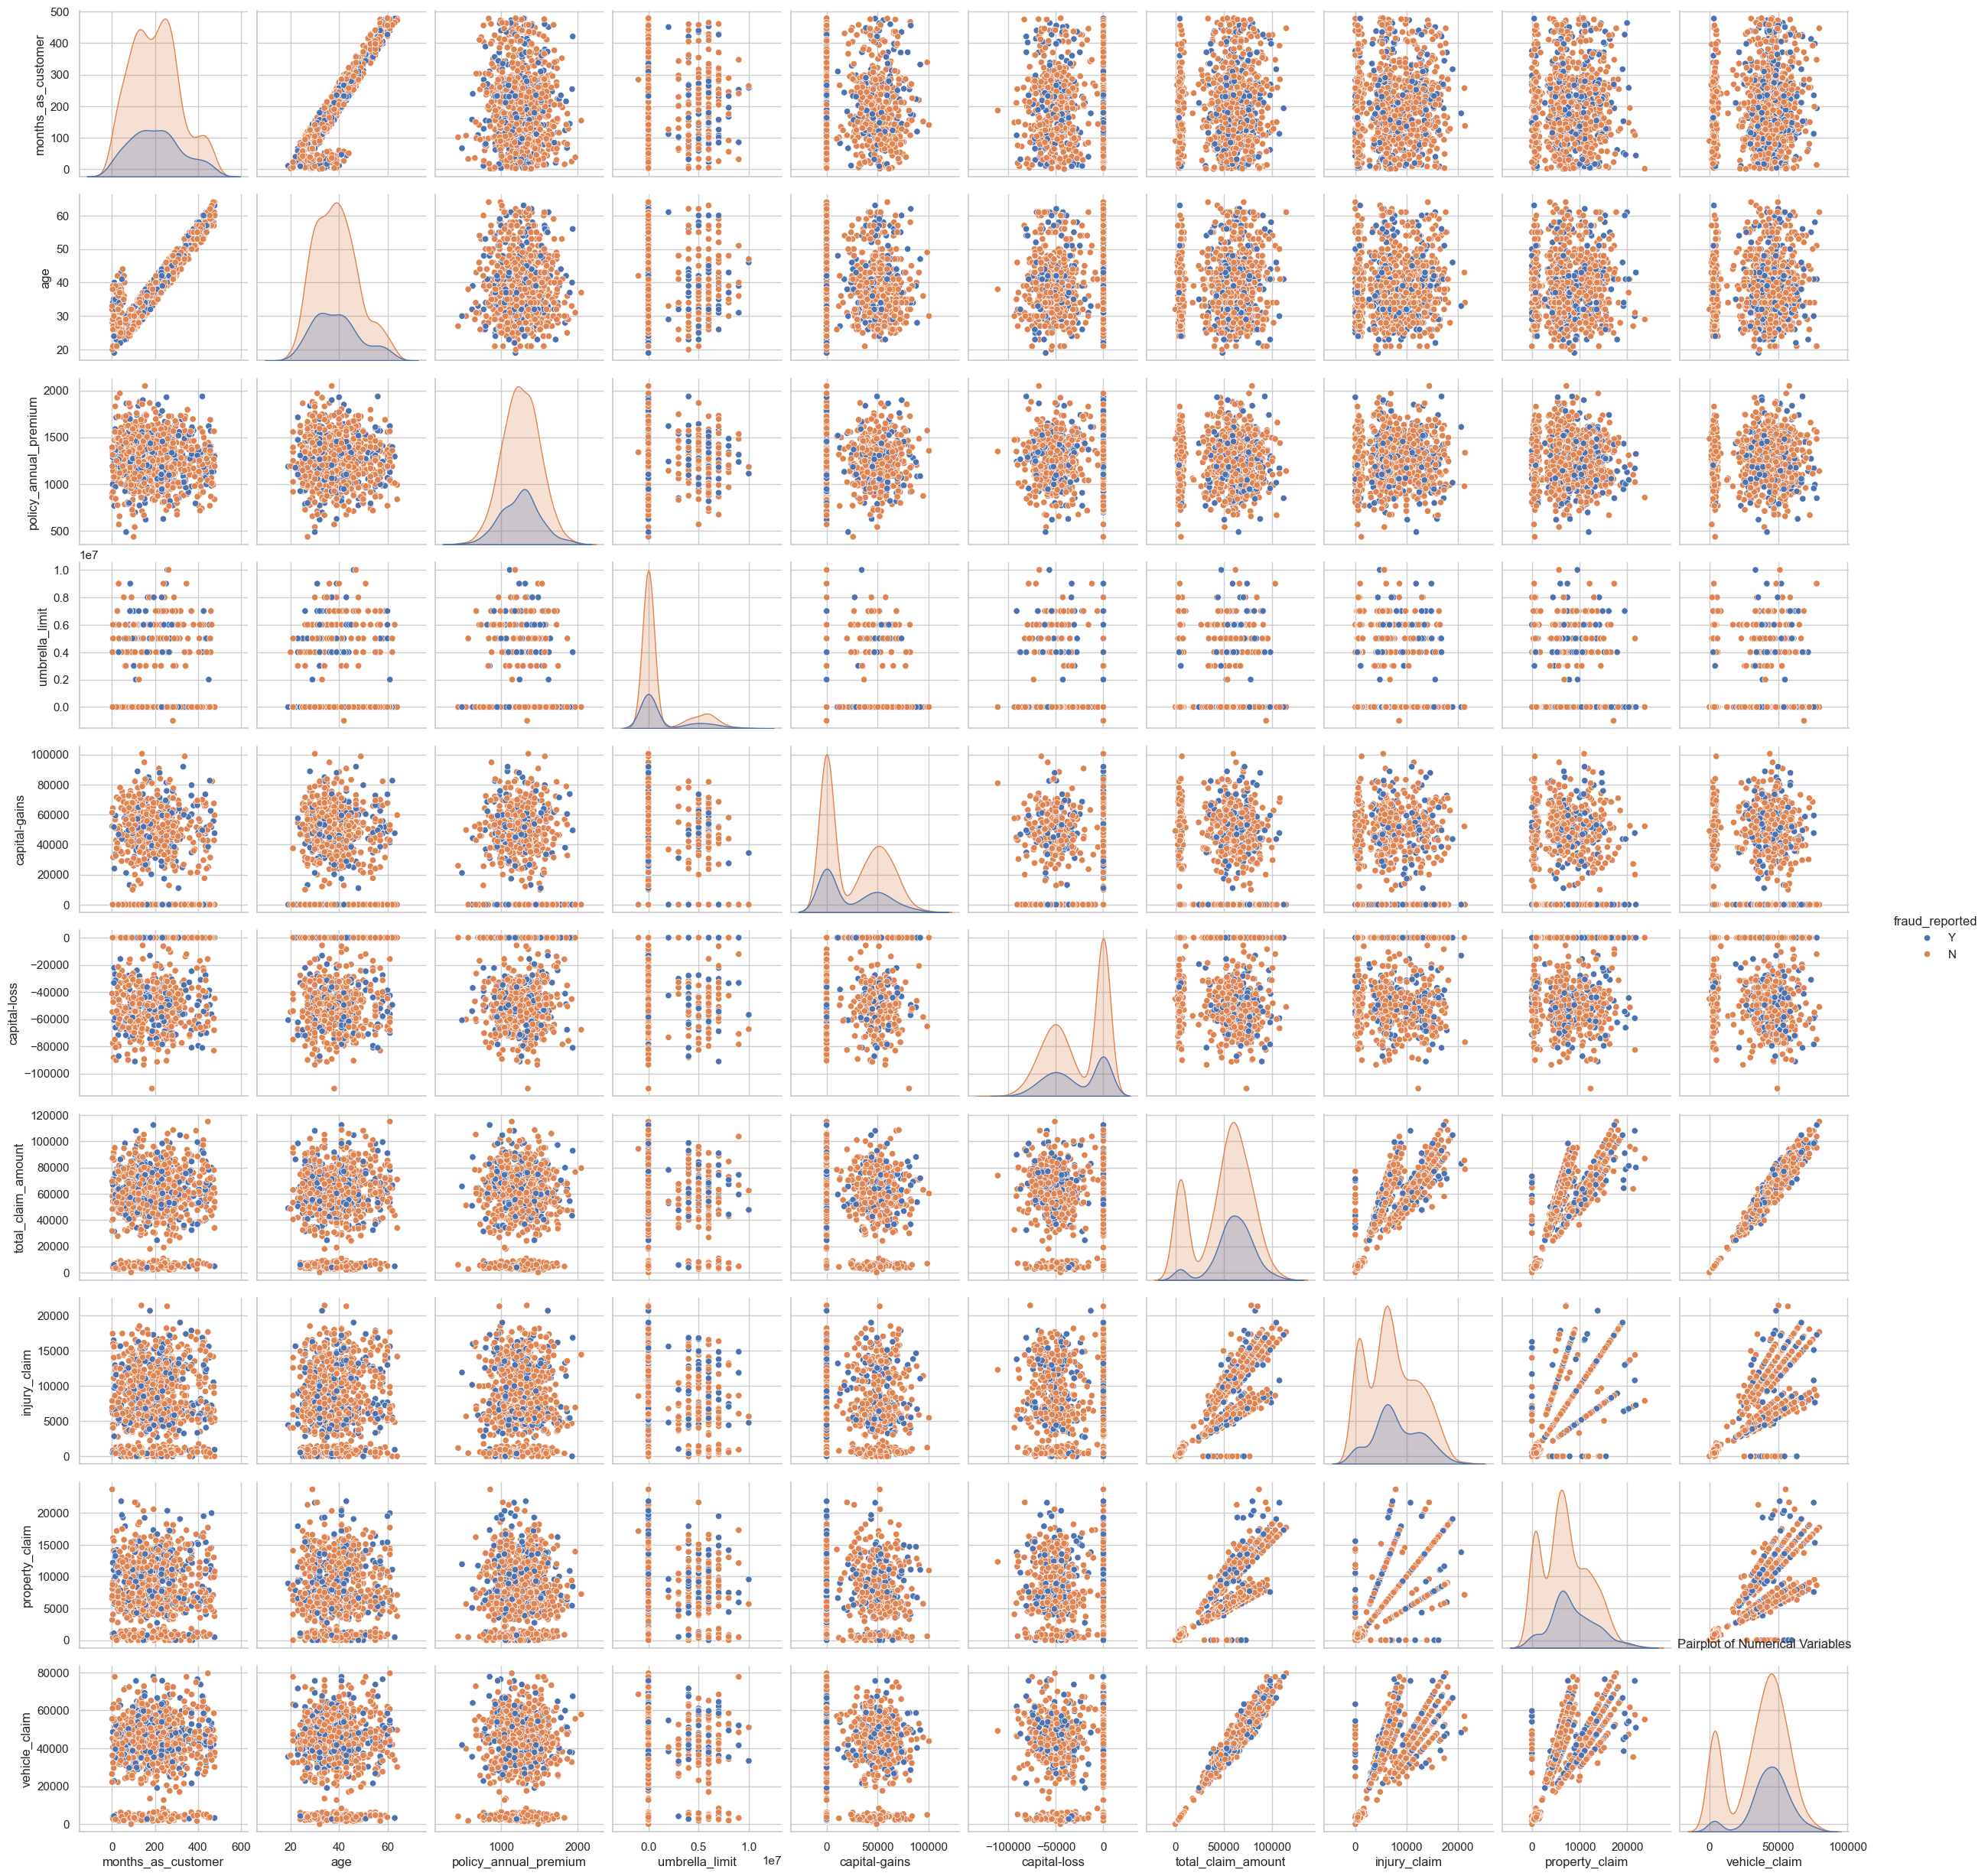

In [11]:
sns.pairplot(df, vars=numerical_col, hue='fraud_reported')
plt.title('Pairplot of Numerical Variables')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], format='%d-%m-%Y')
df['incident_date'] = pd.to_datetime(df['incident_date'], format='%d-%m-%Y')

label_encoders = {}
for col in categorical_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

scaler = StandardScaler()
df[numerical_col] = scaler.fit_transform(df[numerical_col])
df.head()

months_as_customer       age  policy_number policy_bind_date  policy_state  \
0            0.210091  0.335062         342868       2006-06-27             1   
1           -0.606972 -1.087912         687698       2000-09-06             2   
2            0.453472  0.225603         227811       1990-05-25             0   
3            0.210091  0.553982         367455       2014-06-06             0   
4            0.453472  0.006684         104594       2006-10-12             2   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1               2000              -0.241829        1.696847   
1           0               2000               0.642651        1.696847   
2           1               2000               0.653301        2.132170   
3           2               1000               1.342181        2.132170   
4           1               1000               0.388514       -0.479771   

   insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0       468176  ...          0                        0           -1.806155   
1       430632  ...          3                        1           -0.685479   
2       608117  ...          2                        1            0.403751   
3       610706  ...          1                        1           -1.751977   
4       478456  ...          2                        1            0.430272   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0     -1.363354       -1.371776      -1.822197   Mercedes       E400   
1      0.054428       -0.735038      -0.784642      Dodge        RAM   
2     -0.224211       -0.218595       0.678209  Chevrolet      Tahoe   
3     -1.256815       -1.398739      -1.767115     Accura        RSX   
4     -0.209869       -0.204077       0.707868       Saab         95   

   auto_year  fraud_reported  
0       2007               1  
1       2007               0  
2       2014               1  
3       2009               0  
4       2003               1  

[5 rows x 39 columns]

In [13]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [14]:

df['total_premium_claim_ratio'] = df['total_claim_amount'] / (df['policy_annual_premium'] + 1)
df['age_squared'] = df['age'] ** 2
df.head()


months_as_customer       age  policy_number policy_bind_date  policy_state  \
0            0.210091  0.335062         342868       2006-06-27             1   
1           -0.606972 -1.087912         687698       2000-09-06             2   
2            0.453472  0.225603         227811       1990-05-25             0   
3            0.210091  0.553982         367455       2014-06-06             0   
4            0.453472  0.006684         104594       2006-10-12             2   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1               2000              -0.241829        1.696847   
1           0               2000               0.642651        1.696847   
2           1               2000               0.653301        2.132170   
3           2               1000               1.342181        2.132170   
4           1               1000               0.388514       -0.479771   

   insured_zip  ...  total_claim_amount  injury_claim  property_claim  \
0       468176  ...           -1.806155     -1.363354       -1.371776   
1       430632  ...           -0.685479      0.054428       -0.735038   
2       608117  ...            0.403751     -0.224211       -0.218595   
3       610706  ...           -1.751977     -1.256815       -1.398739   
4       478456  ...            0.430272     -0.209869       -0.204077   

   vehicle_claim  auto_make  auto_model  auto_year fraud_reported  \
0      -1.822197   Mercedes        E400       2007              1   
1      -0.784642      Dodge         RAM       2007              0   
2       0.678209  Chevrolet       Tahoe       2014              1   
3      -1.767115     Accura         RSX       2009              0   
4       0.707868       Saab          95       2003              1   

   total_premium_claim_ratio  age_squared  
0                  -2.382252     0.112267  
1                  -0.417300     1.183552  
2                   0.244209     0.050897  
3                  -0.748011     0.306896  
4                   0.309879     0.000045  

[5 rows x 41 columns]

Logistic Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
X = df.drop(columns=['fraud_reported', 'policy_bind_date', 'incident_date', 'incident_city', 'incident_location', 'auto_make', 'auto_model'])
y = df['fraud_reported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred1 = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Accuracy Score:", accuracy_score(y_test, y_pred1))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


Confusion Matrix:
 [[153   0]
 [ 47   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       153
           1       0.00      0.00      0.00        47

    accuracy                           0.77       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.59      0.77      0.66       200

Accuracy Score: 0.765
ROC AUC Score: 0.48852732582394665


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The model achieved an accuracy of 0.77 and a ROC AUC score of 0.49. It correctly identified fraud 0.38 times which is recall but struggled with false positives, indicating the need for a more balanced approach.

In [16]:

train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.7509386733416771
Testing Accuracy: 0.765


In [17]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lr, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_score)
print("Mean CV Accuracy:", cv_score.mean())


Cross-Validation Scores: [0.75       0.755      0.755      0.755      0.75376884]
Mean CV Accuracy: 0.7537537688442211


The LR model shows a training accuracy of 0.76 and testing accuracy of 0.77, indicating no significant overfitting. Cross-validation scores are consistent with a mean CV accuracy of 0.75, confirming the model's stability and generalizability.

Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
y_pred_proba_dtree = dtree.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dtree))
print("Classification Report:\n", classification_report(y_test, y_pred_dtree))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dtree))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_dtree))


Confusion Matrix:
 [[126  27]
 [ 19  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       153
           1       0.51      0.60      0.55        47

    accuracy                           0.77       200
   macro avg       0.69      0.71      0.70       200
weighted avg       0.78      0.77      0.78       200

Accuracy Score: 0.77
ROC AUC Score: 0.7096370463078848


The model achieved an accuracy of 0.77 and a ROC AUC score of 0.80. Class 0 predictions are strong with precision and recall around 0.82 and 0.87. However, Class 1 has lower precision i.e. 0.51 and recall i.e. 0.60, indicating difficulty in identifying fraudulent cases.

In [19]:

train_accuracy_dtree = dtree.score(X_train, y_train)
test_accuracy_dtree = dtree.score(X_test, y_test)

print("Training Accuracy:", train_accuracy_dtree)
print("Testing Accuracy:", test_accuracy_dtree)


Training Accuracy: 1.0
Testing Accuracy: 0.77


Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(random_state=42)
random.fit(X_train, y_train)
y_pred_random = random.predict(X_test)
y_pred_proba_random = random.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random))
print("Classification Report:\n", classification_report(y_test, y_pred_random))
print("Accuracy Score:", accuracy_score(y_test, y_pred_random))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_random))


Confusion Matrix:
 [[142  11]
 [ 33  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       153
           1       0.56      0.30      0.39        47

    accuracy                           0.78       200
   macro avg       0.69      0.61      0.63       200
weighted avg       0.75      0.78      0.75       200

Accuracy Score: 0.78
ROC AUC Score: 0.8360450563204004



The model achieved an accuracy of 0.78 and a ROC AUC score of 0.84. Class 0 shows high precision which is 0.81 and recall 0.93. However, Class 1 has lower precision i.e. 0.56 and recall i.e. 0.30.

In [21]:

train_accuracy_random = random.score(X_train, y_train)
test_accuracy_random = random.score(X_test, y_test)

print("Training Accuracy:", train_accuracy_random)
print("Testing Accuracy:", test_accuracy_random)


Training Accuracy: 1.0
Testing Accuracy: 0.78


In [22]:

cv_scores_random = cross_val_score(random, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_random)
print("Mean CV Accuracy:", cv_scores_random.mean())


Cross-Validation Scores: [0.775      0.77       0.735      0.74       0.75376884]
Mean CV Accuracy: 0.754753768844221


The RF model shows perfect training accuracy which is 1.0 and a testing accuracy of 0.78, indicating potential overfitting. Cross-validation scores are consistent with a mean CV accuracy of 0.75, confirming the model's generalizability despite possible overfitting on the training data.

Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier(random_state=42)
gradient.fit(X_train, y_train)
y_pred_gradient = gradient.predict(X_test)
y_pred_proba_gradient = gradient.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gradient))
print("Classification Report:\n", classification_report(y_test, y_pred_gradient))
print("Accuracy Score:", accuracy_score(y_test, y_pred_gradient))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_gradient))


Confusion Matrix:
 [[134  19]
 [ 13  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       153
           1       0.64      0.72      0.68        47

    accuracy                           0.84       200
   macro avg       0.78      0.80      0.79       200
weighted avg       0.85      0.84      0.84       200

Accuracy Score: 0.84
ROC AUC Score: 0.8578779029342233


The GB model achieved an accuracy of 0.84 and a ROC AUC score of 0.86. It shows high precision, i.e. 0.91 and recall, which is 0.88 for Class 0, and improved precision, i.e. 0.64 and recall, i.e. 0.72 for Class 1, making it a well-balanced model for detecting fraudu cases.

In [24]:

train_accuracy_gradient =gradient.score(X_train, y_train)
test_accuracy_gradient =gradient.score(X_test, y_test)

print("Training Accuracy:", train_accuracy_gradient)
print("Testing Accuracy:", test_accuracy_gradient)


Training Accuracy: 0.9762202753441802
Testing Accuracy: 0.84


In [25]:
cv_scores_gradient = cross_val_score(gradient, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores_gradient)
print("Mean CV Accuracy:", cv_scores_gradient.mean())


Cross-Validation Scores: [0.815      0.79       0.795      0.84       0.86432161]
Mean CV Accuracy: 0.8208643216080402


The Gradient Boosting model achieved a training accuracy of 0.98 and a testing accuracy of 0.84, indicating good generalization. Cross-validation scores are consistent, with a mean CV accuracy of 0.82, confirming the model's stability and reliability for fraud detection.

Hyperparameter Tuning on Best Model

In [26]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_random= {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random = RandomizedSearchCV(estimator=random, param_distributions=param_grid_random, 
                               n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random.fit(X_train, y_train)

print("Best Parameters for Random Forest:", random.best_params_)

best_random= random.best_estimator_
y_pred_best_random = best_random.predict(X_test)
y_pred_proba_best_random = best_random.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_random))
print("Classification Report:\n", classification_report(y_test, y_pred_best_random))
print("Accuracy Score:", accuracy_score(y_test, y_pred_best_random))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_best_random))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters for Random Forest: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Confusion Matrix:
 [[138  15]
 [ 25  22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       153
           1       0.59      0.47      0.52        47

    accuracy                           0.80       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.79      0.80      0.79       200

Accuracy Score: 0.8
ROC AUC Score: 0.8384091225142539


The RF model achieved an accuracy of 0.80 and a ROC AUC score of 0.84. Class 0 predictions are strong with precision i.e. 0.85 and recall i.e. 0.90. Class 1 shows moderate precision i.e. 0.59 and recall i.e. 0.47, indicating room for improvement in detecting fraud cases.

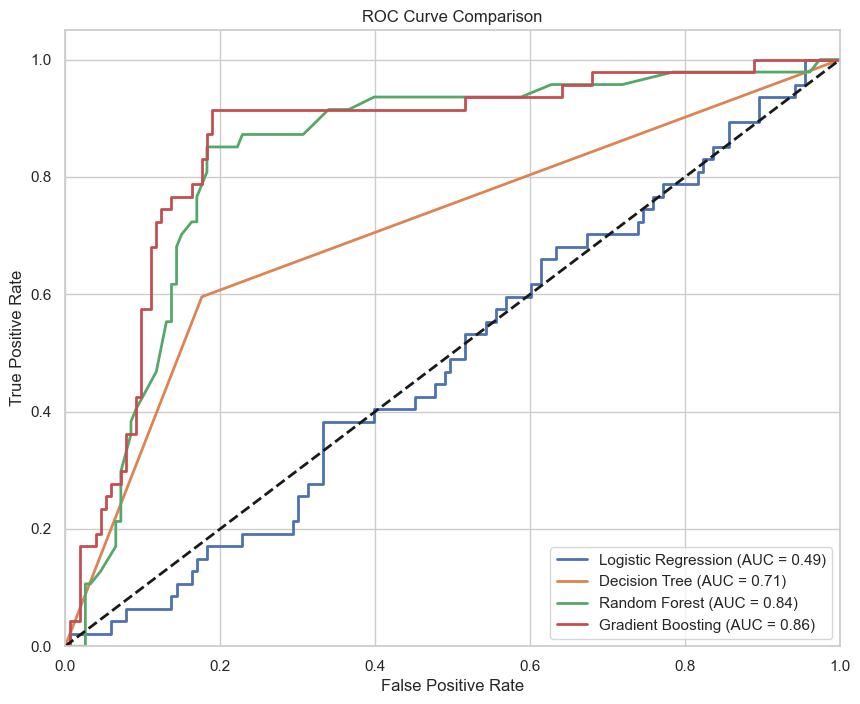

Logistic Regression AUC: 0.49
Decision Tree AUC: 0.71
Random Forest AUC: 0.84
Gradient Boosting AUC: 0.86


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob)
roc_auc_log = auc(fpr_log, tpr_log)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dtree)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_random)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Gradient Boosting
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gradient)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
plot_roc_curve(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
plot_roc_curve(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plot_roc_curve(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plot_roc_curve(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Print AUC scores for comparison
print(f'Logistic Regression AUC: {roc_auc_log:.2f}')
print(f'Decision Tree AUC: {roc_auc_dt:.2f}')
print(f'Random Forest AUC: {roc_auc_rf:.2f}')
print(f'Gradient Boosting AUC: {roc_auc_gb:.2f}')


Based on the ROC curves, Gradient Boosting, where AUC = 0.86 and Random Forest, which has AUC = 0.84 provide superior performance compared to Decision Tree which has AUC = 0.71 and Logistic Regression which has AUC = 0.49. Given its highest AUC, Gradient Boosting is the most effective model for accurately detecting fraudulent claims.